# Feature Extraction

Like feature selection, feature extraction is an another dimensionality reduction techique that summarizes the significant information from the dataset by transforming the features to a lower dimensional space.

In this notes, I will go through understanding the principle component analysis (PCA) using scikit-learn, the linear discriminant analysis (LDA) using scikit-learn, and transforming non-linear data through kernel PCA using scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Understand the Principle Component Analysis

Principle component anaysis (PCA) is an **unsupervised** feature extraction method that does not require the class label. PCA relies on the relationship between features and [focuses on capturing the **maximum variation** in the dataset](https://towardsai.net/p/data-science/lda-vs-pca).

Step-by-step guide on how PCA algorithm works is as follows:
1. Preprocess the $d$-dimensional space of the dataset.
2. Create the **covariance matrix**.
3. Get **eigenvectors** and **eigenvalues** from the covariance matrix.
4. Sort eigenvalues and its associated eigenvectors in descending order.
5. Choose the top $k$ eigenvectors. Note that $k$ represents the new $k$ dimensional space ($k <= d$) of features after PCA.
6. Create the **projection matrix** using the top $k$ eigenvectors.
7. Transform the $d$-dimensional space of the dataset to the new $k$-dimensional space using the projection matrix.

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols',
                  'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
                   '0D280/0D315 of diluted wines', 'proline']
df_wine.head()

,label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,0D280/0D315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].to_numpy(), df_wine.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
X_train_std.T.shape

(13, 124)

Estimate the covariance matrix and compute the eigenvalues and eigenvectors.

In [6]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [7]:
print(eigen_vals)

[4.85143223 2.65844107 1.4790875  0.87616943 0.76269894 0.60534096
 0.54048546 0.08781212 0.14924224 0.32933799 0.28045163 0.23609827
 0.2490932 ]


In [8]:
print(eigen_vecs)

[[ 1.62007047e-01  4.69596927e-01  1.56505664e-01 -1.25480081e-01
   2.26063528e-01  2.73424640e-01 -1.81512530e-01  9.65151339e-02
   2.79044378e-01 -4.09504264e-01 -2.36060512e-01 -3.37371647e-01
   3.60224578e-01]
 [-2.26660205e-01  2.52551135e-01 -1.20391711e-01  5.44127376e-01
   5.93129984e-02  5.70429411e-01  4.06679325e-01 -5.40534175e-02
  -9.66678145e-02 -1.12850429e-01 -2.00093529e-02  9.57398181e-02
  -2.13097037e-01]
 [ 1.80573791e-02  2.91628776e-01 -6.34682574e-01 -1.90433450e-01
   1.20136478e-01  1.16497976e-01 -2.23293416e-01  1.38407065e-01
  -5.64627861e-04  3.81120628e-01  1.50028636e-01 -3.54220364e-01
  -2.92035603e-01]
 [-2.27672899e-01 -3.40631265e-02 -6.13006132e-01  4.52344674e-02
  -1.27684552e-01 -1.19213490e-01 -2.83962181e-01 -1.12110449e-01
   5.46482262e-02 -5.15466097e-01  9.73472520e-03  3.65774301e-01
   2.07090018e-01]
 [ 1.65771115e-01  3.36221340e-01 -1.71086301e-01 -2.46443011e-01
  -6.58543898e-01 -5.12237133e-02  4.56628645e-01 -4.27837791e-02


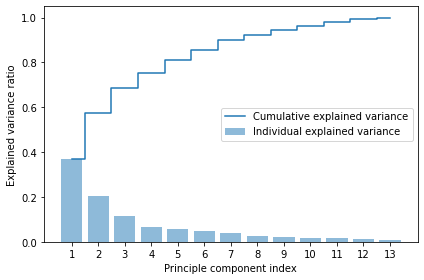

In [9]:
# explained variance ratio for PCA
total = sum(eigen_vals)
exp_var = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_exp_var = np.cumsum(exp_var)
plt.bar(range(1, 14), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_exp_var, where='mid', label='Cumulative explained variance')
plt.xticks(range(1, 14))
plt.xlabel('Principle component index')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Create a list of tuples (eigenvalues, eigenvectors) and sort a list of tuples in descending order using eigenvalues.

In [10]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

Choose the top two pairs of (eigenvalues, eigenvectors) to create the projection matrix.

In [11]:
proj_mat = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print(proj_mat)

[[ 0.16200705  0.46959693]
 [-0.2266602   0.25255114]
 [ 0.01805738  0.29162878]
 [-0.2276729  -0.03406313]
 [ 0.16577112  0.33622134]
 [ 0.40313312  0.03016183]
 [ 0.42726557 -0.04133096]
 [-0.30553779  0.06625969]
 [ 0.31578345  0.05114432]
 [-0.05869919  0.5281404 ]
 [ 0.27397408 -0.27879838]
 [ 0.367594   -0.19486303]
 [ 0.30159632  0.33494436]]


Transform the 124x13 dimensional space dataset to the new 124x2 dimensional space using the projection matrix.

In [12]:
X_train_pca = X_train_std.dot(proj_mat)

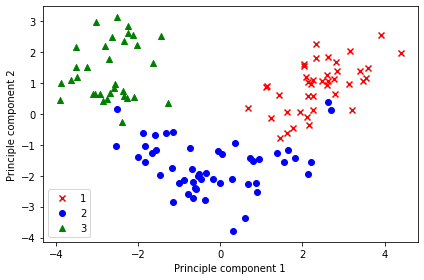

In [13]:
colors = ['r', 'b', 'g']
markers = ['x', 'o', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## PCA using scikit-learn

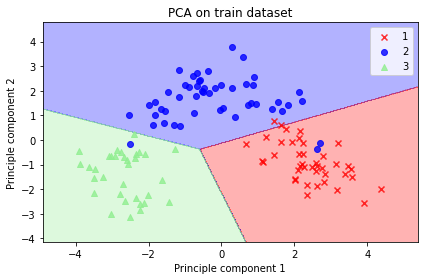

In [14]:
from lib.functions import display_decision_boundary
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LR

# initialize PCA transformer and logistic regression estimator
pca = PCA(n_components=2)
lr = LR(random_state=1)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# train logistic regression model using X_train_pca
lr.fit(X_train_pca, y_train)
display_decision_boundary(X_train_pca, y_train, classifier=lr)
plt.title('PCA on train dataset')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

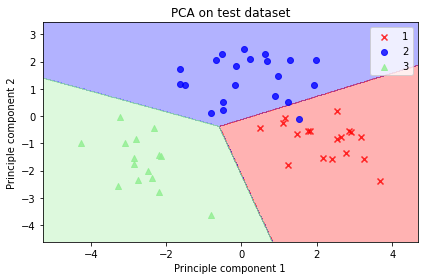

In [15]:
display_decision_boundary(X_test_pca, y_test, classifier=lr)
plt.title('PCA on test dataset')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Comprehend the Linear Discriminant Analysis

Unlike PCA, the linear discriminant analysis is a **supervised** feature extraction technique that aims to find the best subset space of features to distinguish each class. Just a reminder, both PCA and LDA are the **linear transformation** methods for feature extraction to reduce the dimension of the dataset.

Step-by-step guide on how LDA algorithm works is as follows:
1. Preprocess the $d$-dimensional space of the dataset.
2. Compute the **mean vector** for each class in the dataset.
3. Get the **scatter matrices** ($S_W$) and ($S_B$).
4. Calculate **eigenvalues** and **eigenvectors** of the matrix $S_W^{-1} S_B$.
5. Sort eigenvalues and its associated eigenvectors in descending order.
6. Choose the top $k$ eigenvectors. Note that $k$ represents the new $k$ dimensional space ($k <= d$) of features after LDA.
7. Create the **transformation matrix** using the top $k$ eigenvectors.
8. Transform the $d$-dimensional space of the dataset to the new $k$-dimensional space using the transformation matrix.

In [16]:
mean_vecs = []
for l in range(3):
    mean_vecs.append(np.mean(X_train_std[y_train == (l + 1)], axis=0))
    print('Mean vector %s: %s\n' % (l + 1, mean_vecs[l]))

Mean vector 1: [ 0.92508709 -0.29905069  0.35067067 -0.74496376  0.5705887   0.89755475
  0.99427674 -0.57193614  0.60027348  0.26030725  0.48381718  0.77047001
  1.18299154]

Mean vector 2: [-0.89105932 -0.33622825 -0.44720195  0.28586524 -0.48719284 -0.07251028
  0.03964154  0.0079013   0.01656376 -0.86277417  0.38790703  0.25163756
 -0.73495386]

Mean vector 3: [ 0.20073925  0.88098456  0.24189697  0.49243188  0.02925773 -1.00527971
 -1.29537646  0.69861567 -0.77089094  0.98382156 -1.18884411 -1.33851965
 -0.35621092]



Calculate scatter matrix $S_W$: $S_W = \sum_{i=1}^c S_i$ where $S_i = \sum (x-m_i)^T(x-m_i)$.
Scaled scatter matrix $S_W$: ${1 \over n_i} S_i = $ covariance matrix of each class.

In [17]:
d = 13 
S_W = np.zeros((d, d))
for l, mean_vec in zip(range(3), mean_vecs):
    class_scatter_mat = np.cov(X_train_std[y_train == (l + 1)].T)
    S_W += class_scatter_mat

print('Shape of scaled scatter matrix S_W: (%d, %d)' % (S_W.shape[0], S_W.shape[1]))

Shape of scaled scatter matrix S_W: (13, 13)


Calculate scatter matrix $S_B$: $S_B = \sum_{i=1}^c n_i (m_i-m)^T (m_i-m)$ where $m$ is the overall mean for all classes' samples.

In [18]:
overall_mean = np.mean(X_train_std, axis=0)
overall_mean = overall_mean.reshape(d, 1)

In [19]:
d = 13
S_B = np.zeros((d, d))
for l, mean_vec in zip(range(3), mean_vecs):
    n = X_train_std[y_train == (l + 1)].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('Shape of scatter matrix S_B: (%d, %d)' % (S_W.shape[0], S_W.shape[1]))

Shape of scatter matrix S_B: (13, 13)


Calculate eigenvalues and eigenvectors of $S_W^{-1} S_B$. In LDA, the number of linear discriminant vectors (eigenvectors) are $(c-1)$ where c is the number of class labels.

In [20]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [21]:
print(eigen_vals)

[ 0.00000000e+00+0.00000000e+00j  1.79272906e+02+0.00000000e+00j
  3.98781341e+02+0.00000000e+00j  3.24107060e-14+0.00000000e+00j
  3.41105480e-14+0.00000000e+00j  2.04709581e-14+1.05160239e-14j
  2.04709581e-14-1.05160239e-14j -4.06250467e-15+1.25112459e-14j
 -4.06250467e-15-1.25112459e-14j -1.12252700e-14+4.26727377e-15j
 -1.12252700e-14-4.26727377e-15j  3.62009813e-15+0.00000000e+00j
  1.27705116e-16+0.00000000e+00j]


In [22]:
print(eigen_vecs)

[[ 7.79647770e-01+0.j         -3.83327124e-01+0.j
  -8.25774032e-02+0.j          5.01832873e-01+0.j
  -4.38414120e-01+0.j         -5.18998319e-01+0.09505565j
  -5.18998319e-01-0.09505565j  7.08447015e-01+0.j
   7.08447015e-01-0.j          6.44797854e-01+0.j
   6.44797854e-01-0.j         -7.42753879e-01+0.j
  -7.81176242e-01+0.j        ]
 [-8.55666424e-02+0.j         -1.45556223e-01+0.j
   5.20599496e-02+0.j          2.18632187e-01+0.j
  -2.36290124e-01+0.j          2.17458694e-02-0.04785483j
   2.17458694e-02+0.04785483j -1.19869979e-01+0.14796967j
  -1.19869979e-01-0.14796967j -2.34465088e-01+0.14320805j
  -2.34465088e-01-0.14320805j -1.79900147e-02+0.j
   8.71662139e-02+0.j        ]
 [-2.71895971e-01+0.j         -4.04981052e-01+0.j
   5.65025936e-03+0.j         -4.97776106e-01+0.j
   5.32354610e-01+0.j          5.78460106e-01+0.j
   5.78460106e-01-0.j         -2.60598901e-01-0.04349908j
  -2.60598901e-01+0.04349908j -2.18978075e-01+0.11187151j
  -2.18978075e-01-0.11187151j  2.3096113

In [23]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

for eigen_val in eigen_pairs:
    print(eigen_val[0])

398.78134115208286
179.27290610460932
3.411054800245471e-14
3.2410706037166143e-14
2.3014058404323935e-14
2.3014058404323935e-14
1.315428515838731e-14
1.315428515838731e-14
1.2009009590949772e-14
1.2009009590949772e-14
3.6200981257240845e-15
1.277051155999135e-16
0.0


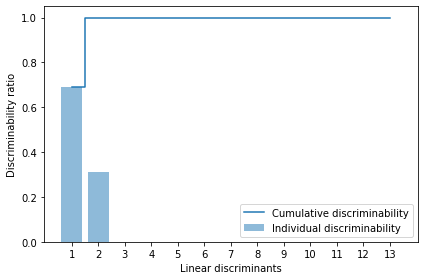

In [24]:
# discriminability ratio for LDA
total = sum(eigen_vals.real)
exp_var = [(i / total) for i in sorted(eigen_vals.real, reverse=True)]
cum_exp_var = np.cumsum(exp_var)
plt.bar(range(1, 14), exp_var, alpha=0.5, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_exp_var, where='mid', label='Cumulative discriminability')
plt.xticks(range(1, 14))
plt.xlabel('Linear discriminants')
plt.ylabel('Discriminability ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print(W)

[[-0.0825774  -0.38332712]
 [ 0.05205995 -0.14555622]
 [ 0.00565026 -0.40498105]
 [ 0.14590555  0.31145446]
 [-0.01732132 -0.03580443]
 [ 0.19747173 -0.02129527]
 [-0.80909913  0.32248913]
 [-0.13756356  0.13606433]
 [ 0.05886905  0.14073166]
 [ 0.18837424 -0.21575164]
 [-0.10477025  0.18787718]
 [-0.35033805  0.10017008]
 [-0.28918188 -0.57872786]]


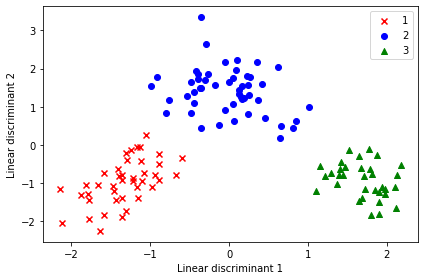

In [26]:
X_train_lda = X_train_std.dot(W)

colors = ['r', 'b', 'g']
markers = ['x', 'o', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1], c=c, label=l, marker=m)

plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## LDA using scikit-learn

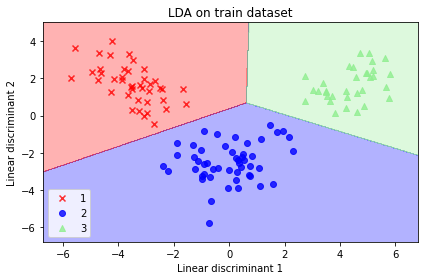

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LR(random_state=2)
lr = lr.fit(X_train_lda, y_train)
display_decision_boundary(X_train_lda, y_train, classifier=lr)
plt.title('LDA on train dataset')
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

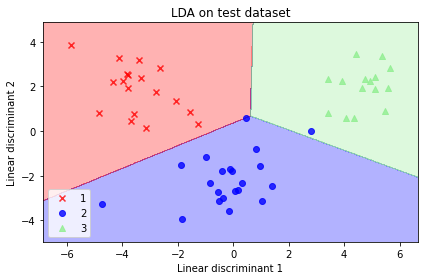

In [28]:
X_test_lda = lda.transform(X_test_std)
display_decision_boundary(X_test_lda, y_test, classifier=lr)
plt.title('LDA on test dataset')
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Transforming non-linear data using Kernel PCA

It is common to have the data that are non-linear. For those data, both PCA and LDA are not suitable because as I metioned before, they are the dimensionality reduction techiques for **linear transformation**. Hence, we need to implement the **kernel PCA** techique which deals with feature extraction of non-linear data by using a **kernel trick**.

The non-linear mapping function $\phi$ is a function to transform the dataset from initial $d$ dimensional space to a higher $k$ dimensional space where $k >> d$. Then in a higher dimensional space, we use PCA to finally transform the data into a lower dimensional space (e.g two dimensional space, PC1 and PC2) where the classifier can able to distinguish each sample linearly. However, this process of computation costs a lot, so we **use kernel trick to calculate the similiarity of two higher dimensional feature-vectors** instead of computing non-linear mapping function.

Calculation of similarity (kernel) function: $K(x^{i}, x^{j}) = \phi(x^{i})^{T} \phi(x^{j}) = exp(-\gamma \|(x^{i} - x^{j}\|^2)$.

In [29]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from numpy import exp

def rbf_kernel_pca(X, gamma, n_components):
    # Radial Basis Function (RBF) Kernel PCA
    #
    # parameters:
    # X: numpy ndarray; shape = [n_samples, n_features]
    # gamma: float;
        # - the only hyperparameter of RBF Kernel PCA
    # n_components: int;
        # - number of principle components
    
    # return:
    # X_kpca: numpy ndarray; shape = [n_samples, n_features]
    
    # calculate the euclidean distance between samples 
    sq_dists = pdist(X, 'sqeuclidean')
    sq_dists_mat = squareform(sq_dists)
    
    # calculate similiarity function
    K = exp(-gamma * sq_dists_mat)
    
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigen_vals, eigen_vecs = eigh(K)
    eigen_vals, eigen_vecs = eigen_vals[::-1], eigen_vecs[:, ::-1]
    
    X_kpca = np.column_stack([eigen_vecs[:, i] for i in range(n_components)])
    
    return X_kpca

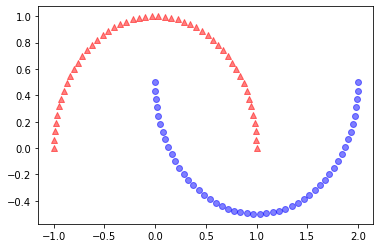

In [30]:
# non-linear data: half-moon
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=100, random_state=123)
plt.scatter(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

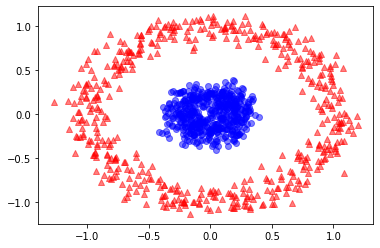

In [31]:
# non-linear data: circle
from sklearn.datasets import make_circles
X_circles, y_circles = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X_circles[y_circles == 0, 0], X_circles[y_circles == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_circles[y_circles == 1, 0], X_circles[y_circles == 1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

Using original linear PCA cannot able to linearly distinguish non-linear data (two class labels).

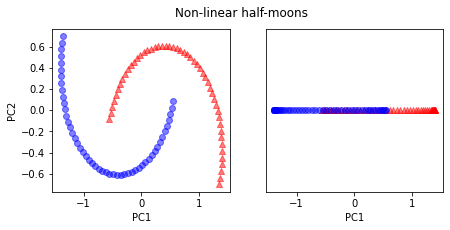

In [32]:
linear_pca = PCA(n_components=2)
X_moons_lpca = linear_pca.fit_transform(X_moons)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
fig.suptitle('Non-linear half-moons')
ax[0].scatter(X_moons_lpca[y_moons == 0, 0], X_moons_lpca[y_moons == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_moons_lpca[y_moons == 1, 0], X_moons_lpca[y_moons == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_moons_lpca[y_moons == 0, 0], np.zeros((50, 1)), color='red', marker='^', alpha=0.5)
ax[1].scatter(X_moons_lpca[y_moons == 1, 0], np.zeros((50, 1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

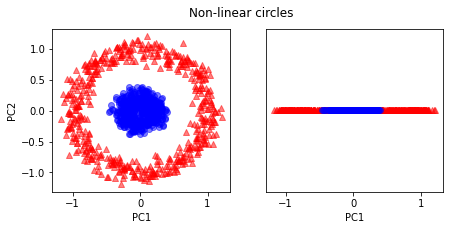

In [33]:
linear_pca = PCA(n_components=2)
X_circles_lpca = linear_pca.fit_transform(X_circles)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
fig.suptitle('Non-linear circles')
ax[0].scatter(X_circles_lpca[y_circles == 0, 0], X_circles_lpca[y_circles == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_circles_lpca[y_circles == 1, 0], X_circles_lpca[y_circles == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_circles_lpca[y_circles == 0, 0], np.zeros((500, 1)), color='red', marker='^', alpha=0.5)
ax[1].scatter(X_circles_lpca[y_circles == 1, 0], np.zeros((500, 1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

Using RBF kernel PCA can able to linearly distinguish non-linear data (two class labels).

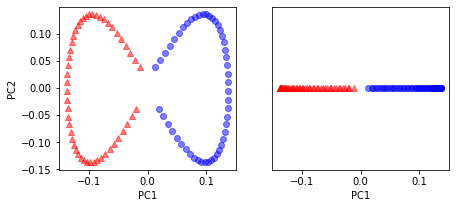

In [34]:
X_moons_kpca = rbf_kernel_pca(X_moons, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_moons_kpca[y_moons == 0, 0], X_moons_kpca[y_moons == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_moons_kpca[y_moons == 1, 0], X_moons_kpca[y_moons == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_moons_kpca[y_moons == 0, 0], np.zeros((50, 1)), color='red', marker='^', alpha=0.5)
ax[1].scatter(X_moons_kpca[y_moons == 1, 0], np.zeros((50, 1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

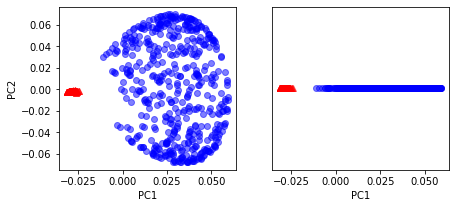

In [35]:
X_circles_kpca = rbf_kernel_pca(X_circles, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_circles_kpca[y_circles == 0, 0], X_circles_kpca[y_circles == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_circles_kpca[y_circles == 1, 0], X_circles_kpca[y_circles == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_circles_kpca[y_circles == 0, 0], np.zeros((500, 1)), color='red', marker='^', alpha=0.5)
ax[1].scatter(X_circles_kpca[y_circles == 1, 0], np.zeros((500, 1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

## Kernel PCA using scikit-learn

kernel PCA using scikit-learn shows almost identical result like the function ```rbf_kernel_pca()``` we implemented.

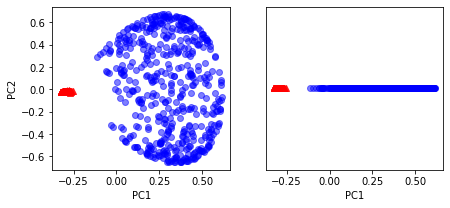

In [36]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_circles_scikit = scikit_kpca.fit_transform(X_circles)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_circles_scikit[y_circles == 0, 0], X_circles_scikit[y_circles == 0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_circles_scikit[y_circles == 1, 0], X_circles_scikit[y_circles == 1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_circles_scikit[y_circles == 0, 0], np.zeros((500, 1)), color='red', marker='^', alpha=0.5)
ax[1].scatter(X_circles_scikit[y_circles == 1, 0], np.zeros((500, 1)), color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()